In [1]:
from onset_functions import *
import datetime as dt
from inf_inj_time import *
from math import sqrt

time: 1.37 s (started: 2022-08-17 15:25:30 +03:00)


In [16]:
event_date = 20211028

#Path for the downloaded data
path = '/home/smurf/solo/data/'
#Path to save plots
file_path = f'/home/smurf/serpentine/eventlist/{event_date}/'
#Path for plot of highest peak flux and earliest onset time
#file_path_max = f'/home/smurf/serpentine/eventlist/{event_date}/max_{event_date}/'

#Plot time range
sdate = datetime.date(2021, 10, 27)
edate = datetime.date(2021, 10, 30)
plot_range = [dt.datetime(2021, 10, 27, 0),dt.datetime(2021, 10, 30, 0)]

time: 1.2 ms (started: 2022-08-17 15:27:02 +03:00)


In [3]:
#Get event data
event_onset = Event(spacecraft='soho', sensor='ephin', data_level='l2', species = 'e', start_date=sdate, end_date=edate, data_path=path)

time: 115 ms (started: 2022-08-17 15:25:31 +03:00)


In [17]:
#Particle type for filename
particle_type = 'EPHIN_e'
particle_ch = ['1300']
#Add particle specific folder to file path
file_path = file_path + particle_type + '_' + str(event_date) + '/'

time: 658 µs (started: 2022-08-17 15:27:05 +03:00)


In [18]:
file_path

'/home/smurf/serpentine/eventlist/20211028/EPHIN_e_20211028/'

time: 2.59 ms (started: 2022-08-17 15:27:06 +03:00)


# Event plots

In [6]:
#Determine resample period (e.g. 10min, 30S)

averaging = '1min'

time: 819 µs (started: 2022-08-17 15:25:31 +03:00)


In [7]:
# Determine and adjust background start and length (e.g. 3, 8.1)

bg_start = 1
bg_length = 16

time: 587 µs (started: 2022-08-17 15:25:32 +03:00)


##### >Energy channels< #####
0.67 - 10.4 MeV
#############################

##### >Flux peak< #####
time
2021-10-29 04:55:00    9.6816
Freq: 10T, Name: E1300, dtype: float64
#######################

##### >Onset time< #####
2021-10-28 15:45:00
########################

##### >Mean of background intensity< #####
0.005526768220328283
##########################################

##### >Std of background intensity< #####
0.0006826145292644913
#########################################

##### >Particle species< #####
electrons
##############################



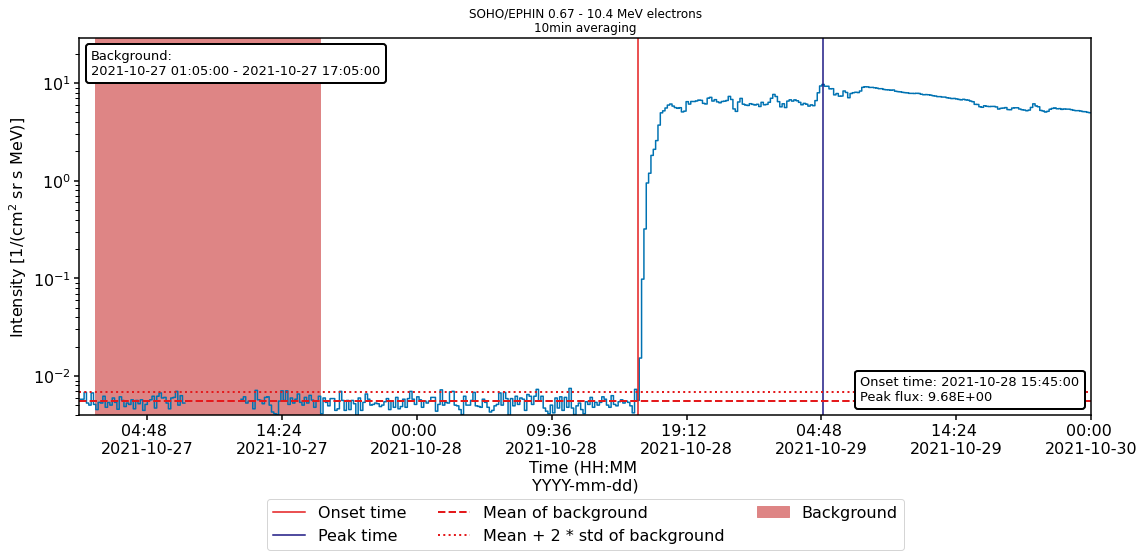

time: 863 ms (started: 2022-08-17 15:25:32 +03:00)


In [8]:
#Generate event plots for different viewing directions

flux, onset_stats, onset_found, peak_flux, peak_time, fig, bg_mean = event_onset.analyse(viewing='', bg_start=bg_start, bg_length=bg_length, channels=particle_ch,
                                                                                         resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range)
onset = onset_stats[-1]
peak_flux = peak_flux.values[0]

In [9]:
print(f"Onset: {onset}")
print(f"Peak flux: {peak_flux:.2E}")
print(f"Peak time: {peak_time}")
print(f"Bg mean: {bg_mean:.2E}")

Onset: 2021-10-28 15:45:00
Peak flux: 9.68E+00
Peak time: 2021-10-29 04:55:00
Bg mean: 5.53E-03
time: 917 µs (started: 2022-08-17 15:25:33 +03:00)


# Saving figures

In [19]:
#Create file name for maximum peak flux plot (if averaging is 10min)
filename_flux = f'{file_path}SOHO_{particle_type}_{event_date}_{averaging}.png'

time: 600 µs (started: 2022-08-17 15:27:18 +03:00)


In [20]:
#Check right filename
filename_flux

'/home/smurf/serpentine/eventlist/20211028/EPHIN_e_20211028/SOHO_EPHIN_e_20211028_10min.png'

time: 3.65 ms (started: 2022-08-17 15:27:19 +03:00)


In [12]:
#Save maximum peak flux plot
fig.savefig(filename_flux, facecolor= 'white', transparent=False)

time: 199 ms (started: 2022-08-17 15:25:33 +03:00)


# Inferred injection time

In [13]:
geom_mean = sqrt(25*40)

time: 330 µs (started: 2022-08-17 15:25:33 +03:00)


In [14]:
inj_time, distance = inf_inj_time('Soho', onset.to_pydatetime(), 'p', geom_mean, 400)

INFO: Obtained JPL HORIZONS location for SOHO (spacecraft) (-21) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Sun (10) [sunpy.coordinates.ephemeris]
time: 2.47 s (started: 2022-08-17 15:25:33 +03:00)


In [15]:
print(pd.Timestamp(inj_time))
print(f"{distance:.2F}")

2021-10-28 15:07:42.857685
0.98 AU
time: 625 µs (started: 2022-08-17 15:25:36 +03:00)
